In [ ]:
!pip install --upgrade --force-reinstall seaborn patsy

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/DUE.csv")
dfSemTratamento = pd.read_csv("/content/DUE-SEM-TRATAMENTO.csv")


In [ ]:
df

In [ ]:
dfSemTratamento

In [ ]:
grupo_treinado = df[df['Tratamento'] == 'DUE_T']
grupo_nao_treinado = df[df['Tratamento'] == 'DUE_NT']


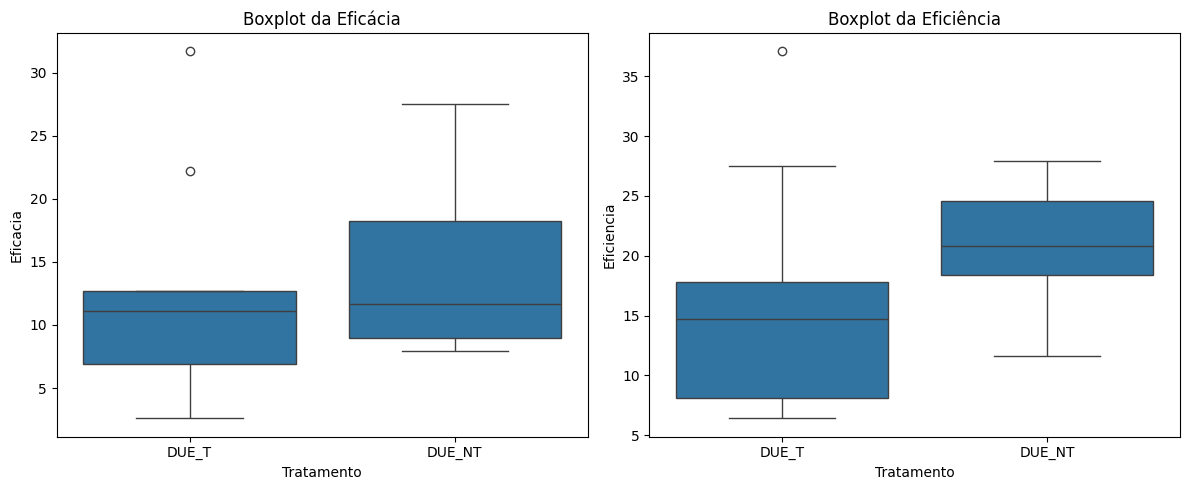

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Tratamento", y="Eficacia", data=dfSemTratamento)
plt.title("Boxplot da Eficácia")

plt.subplot(1, 2, 2)
sns.boxplot(x="Tratamento", y="Eficiencia", data=dfSemTratamento)
plt.title("Boxplot da Eficiência")

plt.tight_layout()
plt.show()


In [ ]:
print("🎯 Testes de Normalidade (Shapiro-Wilk):\n")

for metrica in ['Eficacia', 'Eficiencia']:
    stat_t, p_t = stats.shapiro(grupo_treinado[metrica])
    stat_nt, p_nt = stats.shapiro(grupo_nao_treinado[metrica])
    print(f"{metrica} - Treinado: p = {p_t:.4f}")
    print(f"{metrica} - Não Treinado: p = {p_nt:.4f}")
    print("→ Normal" if p_t > 0.05 and p_nt > 0.05 else "→ Pode não ser normal")
    print("")

🎯 Testes de Normalidade (Shapiro-Wilk):

Eficacia - Treinado: p = 0.6711
Eficacia - Não Treinado: p = 0.1291
→ Normal

Eficiencia - Treinado: p = 0.2843
Eficiencia - Não Treinado: p = 0.9117
→ Normal



In [ ]:
t_eficacia, p_eficacia = stats.ttest_ind(grupo_treinado['Eficacia'], grupo_nao_treinado['Eficacia'])
t_eficiencia, p_eficiencia = stats.ttest_ind(grupo_treinado['Eficiencia'], grupo_nao_treinado['Eficiencia'])

In [ ]:
print("📌 Testes de Hipóteses (t-teste independente):\n")
print(f"Eficácia: t = {t_eficacia:.2f}, p = {p_eficacia:.4f}")
print("→ Rejeita H0" if p_eficacia < 0.05 else "→ Não rejeita H0")
print("")
print(f"Eficiência: t = {t_eficiencia:.2f}, p = {p_eficiencia:.4f}")
print("→ Rejeita H0" if p_eficiencia < 0.05 else "→ Não rejeita H0")


📌 Testes de Hipóteses (t-teste independente):

Eficácia: t = -2.03, p = 0.0636
→ Não rejeita H0

Eficiência: t = -2.17, p = 0.0495
→ Rejeita H0
